# Import Libraries
Here, we will need the following

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load/Inspect Dataset
First let's load the dataset

In [2]:
df = pd.read_csv('haberman.csv')

df.head() # check first few rows of the dataframe

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
df.shape # check the shape of the dataframe

(306, 4)

That is, there are 306 rows, and 4 columns

In [4]:
df.columns # columns labels of the dataframe

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [9]:
df.isnull().sum() # check for null values

age       0
year      0
nodes     0
status    0
dtype: int64

No missing values in any of the columns, now let's check mean, median, and std for each column

In [68]:
df.describe() # check mean, median, and std for each column

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


This shows that age column had highest deviation with std of 10.8 years. That is, cancer patients are coming from wide spectrum of ages. Next, let's find number of classes in each column

In [5]:
df.nunique() # check how many classes in each column

age       49
year      12
nodes     31
status     2
dtype: int64

This means that there are large number of classes in each column, except for 'status' column which had only 2 classes

Going back to the dataset [source](https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival), we see that rows represents different cancer patients and status column represents survival from cancer and has 2 distinct classes, 1 and 2. Class 1 means the patient survived 5 years or longer while Class 2 represents the patient died within 5 year of cancer diagnosis. Therefore, the status column is the target variable which we want to predict based on other feature columns like age, year, and nodes

Next, let's check if the dataframe is balanced, meaning, if it has nearly equal number of patients for each category

In [6]:
df.status.value_counts() # check number of patients in each class

1    225
2     81
Name: status, dtype: int64

It seems that the dataframe is slightly imbalanced as the Class 1 patients more than double Class 2 patients. While this may pose a problem when creating a ML model as it forces the model to overfit, for this analysis, we will only explore the data and need not manipulate/edit for for further ML processing

# Exploratory Data Analysis
Here, we will explore the dataframe's columns and how they relate to the target variable, status. A number of plots covering univariate and bivariate analysis will be used to do so.

First, we will create 1-D plots to see how features influence target classes. We start with PDFs

<Figure size 720x1080 with 0 Axes>

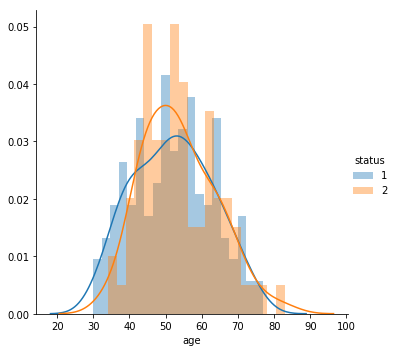

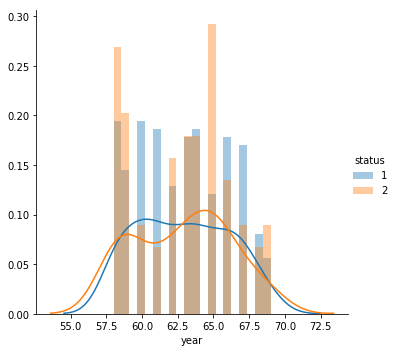

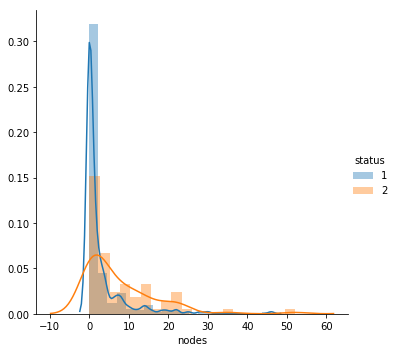

In [42]:
plt.figure(figsize=(10, 15))
sns.FacetGrid(data=df, hue='status', height=5).map(sns.distplot, 'age', bins=20).add_legend()
sns.FacetGrid(data=df, hue='status', height=5).map(sns.distplot, 'year', bins=20).add_legend()
sns.FacetGrid(data=df, hue='status', height=5).map(sns.distplot, 'nodes', bins=20).add_legend()

plt.show()

We can see that target classes 1 and 2 overlap in all histogram plots for feature columns. From the above plots, we see that none of the features decisively separate target values into separate classes. In other words, the patient classes are **not linearily separable**. 

To further understand and visualize distrbution in each of the feature columns, we will create cumulative distribution functions for each of them

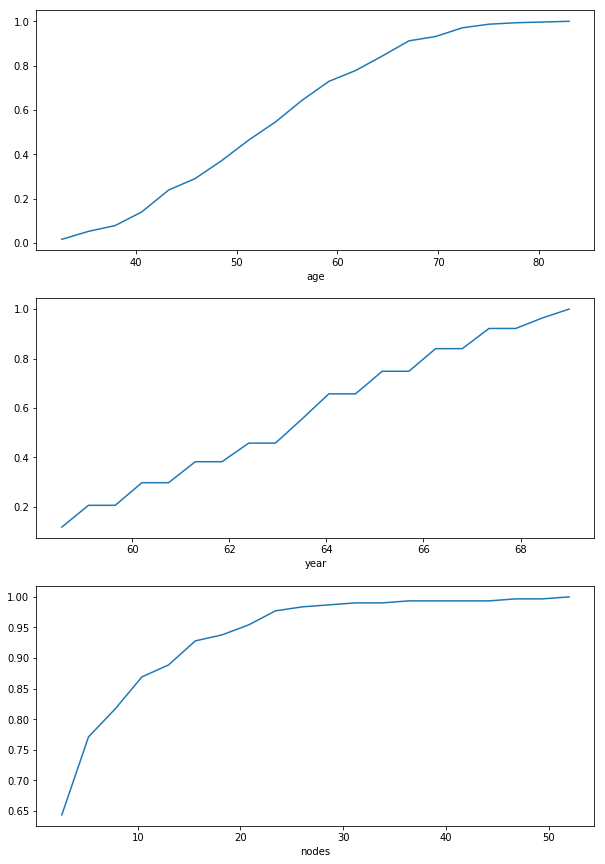

In [51]:
plt.figure(figsize=(10, 15))
for i, c in enumerate(list(df.columns)[:-1]):
    hist, bin_edges = np.histogram(df[c], bins=20, density=True)
    pdf=hist/(sum(hist))
    cdf = np.cumsum(pdf)
    plt.subplot(3, 1, i+1)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(c)
    

From the above CDF plots, we see that age and year columns are almost lineary proportional with their concentrations, the larger the year or age, the more data points that fall under propotionally. For example, 60% of the patients had operations in year 1964 or before and 70% of the patients were 60 years of age or younger. Nodes column, on the other hand, shows a rapid increase (almost exponential) with data concentration. For example, 95% of the patients had 20 positive axillary nodes or less

Next, we will create boxplots to further visualize distribution of the points. The bigger the box of certain feature, the wider-spread it is.

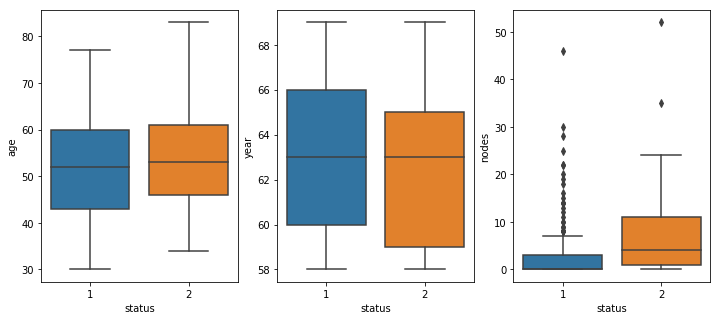

In [64]:
plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.boxplot(data=df,x='status', y='age')
plt.subplot(132)
sns.boxplot(data=df,x='status', y='year')
plt.subplot(133)
sns.boxplot(data=df,x='status', y='nodes')

plt.show()

From the above boxplots, generally speaking, we can see that status 1 & 2 are overlapping in all feature columns for the most part, although nodes' column shows relatively significant distinction (difference) between status 1 & 2 and therefore can be used to draw further conclusions. It also shows that age and year columns have big boxes and hence are widespread compared to the narrow spreadness in nodes column

Next, we will use violin plots to visualize median as well as distrbution in each of the feature columns

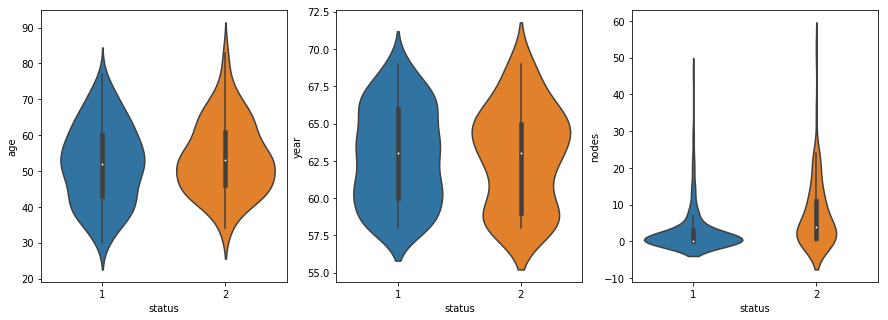

In [67]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.violinplot(data=df,x='status', y='age')
plt.subplot(132)
sns.violinplot(data=df,x='status', y='year')
plt.subplot(133)
sns.violinplot(data=df,x='status', y='nodes')

plt.show()

Again, violin plots shows the same results as shown through the boxplots but also shows that patients with status 2 had higher median number of nodes than status 1 patients. Other medians for status 1 & 2 were almost identical

It may be easier to visualize relations using 2-D plots between different columns to directly find any significant relations between variables, just by eye-balling the plots. So, we will create a pair plot that does this for us

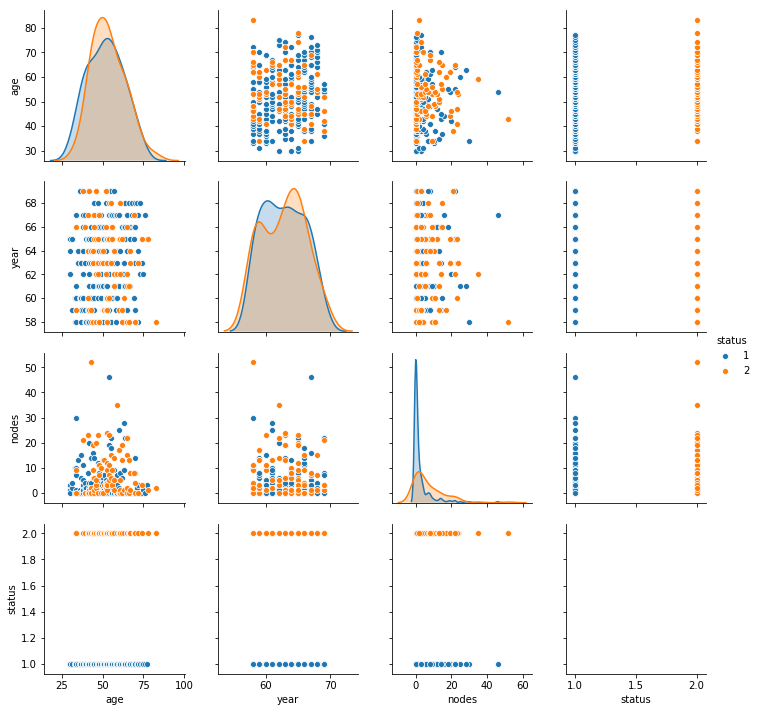

In [11]:
sns.pairplot(data=df, hue='status')
plt.show()

Unsurprisingly, the patients with different status are overlapping for the most part and there seems to be not a plot that segregates the patients with 2 statuses decisively. 

# Observations/Conclusions
From the above exploratory analysis, we have gone through different phases to explore the data including univariate and multivariate analyses. The below can be concluded:
* There is not a single variable that clearly segregates patient statuses
* With distribution analysis through boxplots and violin plots, we have seen that patients' number of positive axillary nodes can be a helpful parameter to distinguish between status 1 and status 2 patients as their medians differ significantly from the other feature comparisons
* We cannot create an if-else model to generalize over datapoints to accurately predict status from age, year, and num of nodes